In [1]:
!nvidia-smi

Mon Oct 24 16:40:44 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow import math
from keras.utils.vis_utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation

from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

import pathlib
import os

import zipfile

## Mount Google Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Unzip Files

In [4]:
my_files = zipfile.ZipFile('/content/drive/MyDrive/hotdog_pizza.zip')
my_files.extractall()
my_files.close()

## Analyze Data

In [2]:
def display_random_image(dir, class_type):
  img_dir = dir + '/' + class_type
  files = os.listdir(img_dir)
  img_name = random.choice(files)
  img = mpimg.imread(img_dir + '/' + img_name)
  plt.imshow(img)
  plt.title(class_type)
  plt.axis("off")
  print("Image Shape: ", img.shape)

Image Shape:  (512, 512, 3)


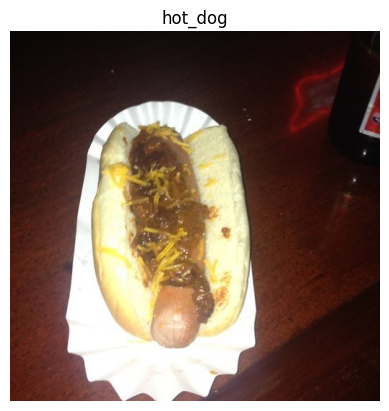

In [3]:
display_random_image('hotdog_pizza', 'hot_dog')

Image Shape:  (384, 512, 3)


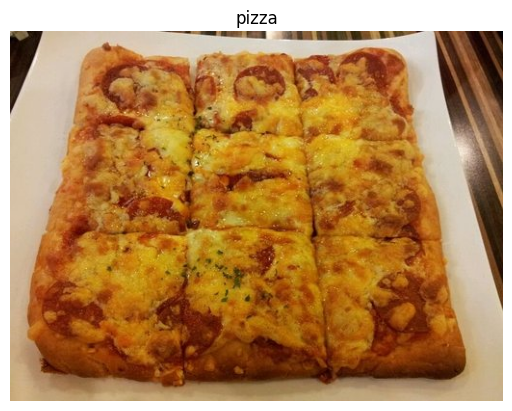

In [4]:
display_random_image('hotdog_pizza', 'pizza')

## Prepare Data

In [5]:
# 256x256 (Batches of 32 images)
from sklearn.utils import validation
data_dir = 'hotdog_pizza/'

training_data = tf.keras.utils.image_dataset_from_directory(data_dir, 
                                                            validation_split=0.2,
                                                            subset='training',
                                                            batch_size=32,
                                                            image_size=(256, 256),
                                                            seed=66)

validation_data = tf.keras.utils.image_dataset_from_directory(data_dir, 
                                                            validation_split=0.2,
                                                            subset='validation',
                                                            batch_size=32,
                                                            image_size=(256, 256),
                                                            seed=66)

Found 2000 files belonging to 2 classes.
Using 1600 files for training.
Found 2000 files belonging to 2 classes.
Using 400 files for validation.


In [6]:
class_names = training_data.class_names
print(class_names)

['hot_dog', 'pizza']


## Normalize the Data

In [7]:
norm_layer = tf.keras.layers.Rescaling(1/255.)
training_data_norm = training_data.map(lambda x, y: (norm_layer(x), y))
validation_data_norm = validation_data.map(lambda x, y: (norm_layer(x), y))

In [8]:
image_batch, labels_batch = next(iter(training_data_norm))
image_batch[0]

<tf.Tensor: shape=(256, 256, 3), dtype=float32, numpy=
array([[[0.47401965, 0.36029413, 0.30539218],
        [0.44852945, 0.33480394, 0.27990198],
        [0.45784315, 0.33235297, 0.28137258],
        ...,
        [0.02058824, 0.00294118, 0.01666667],
        [0.03921569, 0.01960784, 0.03529412],
        [0.05196079, 0.03235294, 0.04803922]],

       [[0.4534314 , 0.33088237, 0.27892157],
        [0.42058825, 0.29803923, 0.24607845],
        [0.34754905, 0.22205883, 0.17107844],
        ...,
        [0.02205882, 0.00441176, 0.01813726],
        [0.06421569, 0.04460784, 0.06029412],
        [0.03872549, 0.01911765, 0.03480392]],

       [[0.37352943, 0.24607845, 0.19607845],
        [0.34509805, 0.21764708, 0.16764706],
        [0.33676472, 0.20931374, 0.15931374],
        ...,
        [0.03186275, 0.0122549 , 0.02794118],
        [0.05539216, 0.03578432, 0.05147059],
        [0.02107843, 0.00392157, 0.01715686]],

       ...,

       [[0.26911765, 0.16715688, 0.10637256],
        [0.26

## Try Non-CNN Model on Data

In [12]:
from tensorflow.python import metrics
tf.random.set_seed(66)

model_1 = Sequential([
    Flatten(input_shape=(256, 256, 3)),
    Dense(4, activation='relu'),
    Dense(4, activation='relu'),
    Dense(1, activation='sigmoid'),
])

model_1.compile(loss='binary_crossentropy',
                optimizer=keras.optimizers.Adam(),
                metrics=['accuracy'])

history_1 = model_1.fit(training_data_norm, 
                        epochs=5,
                        validation_data=validation_data_norm,
                        validation_steps=len(validation_data_norm))

Epoch 1/5
50/50 [==============================] - 7s 77ms/step - loss: 0.7873 - accuracy: 0.5069 - val_loss: 0.6935 - val_accuracy: 0.4650
Epoch 2/5
50/50 [==============================] - 4s 76ms/step - loss: 0.6964 - accuracy: 0.5088 - val_loss: 0.6937 - val_accuracy: 0.4650
Epoch 3/5
50/50 [==============================] - 4s 78ms/step - loss: 0.6931 - accuracy: 0.5088 - val_loss: 0.6939 - val_accuracy: 0.4650
Epoch 4/5
50/50 [==============================] - 4s 77ms/step - loss: 0.6930 - accuracy: 0.5088 - val_loss: 0.6940 - val_accuracy: 0.4650
Epoch 5/5
50/50 [==============================] - 4s 78ms/step - loss: 0.6931 - accuracy: 0.5088 - val_loss: 0.6942 - val_accuracy: 0.4650


In [13]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 196608)            0         
                                                                 
 dense (Dense)               (None, 4)                 786436    
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 786,461
Trainable params: 786,461
Non-trainable params: 0
_________________________________________________________________


In [14]:
model_2 = Sequential()
model_2.add(Flatten(input_shape=(256, 256, 3)))
model_2.add(Dense(4, activation='relu'))
model_2.add(Dense(4, activation='relu'))
model_2.add(Dense(1, activation='sigmoid'))

model_2.compile(loss='binary_crossentropy', 
                optimizer=keras.optimizers.Adam(),
                metrics=['accuracy'])

model_2.fit(training_data_norm, epochs=10, 
            validation_data=validation_data_norm,
            validation_steps=len(validation_data_norm))

Epoch 1/10
50/50 [==============================] - 5s 80ms/step - loss: 0.9127 - accuracy: 0.5019 - val_loss: 0.6928 - val_accuracy: 0.5350
Epoch 2/10
50/50 [==============================] - 4s 78ms/step - loss: 0.6933 - accuracy: 0.4913 - val_loss: 0.6930 - val_accuracy: 0.5350
Epoch 3/10
50/50 [==============================] - 4s 78ms/step - loss: 0.6932 - accuracy: 0.4913 - val_loss: 0.6931 - val_accuracy: 0.5350
Epoch 4/10
50/50 [==============================] - 5s 100ms/step - loss: 0.6932 - accuracy: 0.4988 - val_loss: 0.6932 - val_accuracy: 0.4650
Epoch 5/10
50/50 [==============================] - 4s 77ms/step - loss: 0.6932 - accuracy: 0.5088 - val_loss: 0.6934 - val_accuracy: 0.4650
Epoch 6/10
50/50 [==============================] - 4s 77ms/step - loss: 0.6931 - accuracy: 0.5088 - val_loss: 0.6935 - val_accuracy: 0.4650
Epoch 7/10
50/50 [==============================] - 4s 77ms/step - loss: 0.6931 - accuracy: 0.5088 - val_loss: 0.6936 - val_accuracy: 0.4650
Epoch 8/10
5

In [15]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 196608)            0         
                                                                 
 dense_3 (Dense)             (None, 4)                 786436    
                                                                 
 dense_4 (Dense)             (None, 4)                 20        
                                                                 
 dense_5 (Dense)             (None, 1)                 5         
                                                                 
Total params: 786,461
Trainable params: 786,461
Non-trainable params: 0
_________________________________________________________________


## Try Non-CNN with more layers

In [16]:
model_3 = Sequential()
model_3.add(Flatten(input_shape=(256, 256, 3)))
model_3.add(Dense(100, activation='relu'))
model_3.add(Dense(100, activation='relu'))
model_3.add(Dense(100, activation='relu'))
model_3.add(Dense(1, activation='sigmoid'))

model_3.compile(loss='binary_crossentropy',
                optimizer=keras.optimizers.Adam(),
                metrics=['accuracy'])

model_3.fit(training_data_norm,
            epochs=10,
            validation_data=validation_data_norm,
            validation_steps=len(validation_data_norm))

Epoch 1/10
50/50 [==============================] - 5s 81ms/step - loss: 5.3514 - accuracy: 0.5462 - val_loss: 0.8974 - val_accuracy: 0.6875
Epoch 2/10
50/50 [==============================] - 4s 79ms/step - loss: 1.4010 - accuracy: 0.5931 - val_loss: 1.5526 - val_accuracy: 0.5400
Epoch 3/10
50/50 [==============================] - 4s 79ms/step - loss: 0.7802 - accuracy: 0.6575 - val_loss: 1.0131 - val_accuracy: 0.5775
Epoch 4/10
50/50 [==============================] - 4s 80ms/step - loss: 0.7633 - accuracy: 0.6506 - val_loss: 0.9122 - val_accuracy: 0.6650
Epoch 5/10
50/50 [==============================] - 4s 79ms/step - loss: 0.6680 - accuracy: 0.6794 - val_loss: 0.5583 - val_accuracy: 0.7225
Epoch 6/10
50/50 [==============================] - 4s 79ms/step - loss: 0.5566 - accuracy: 0.7206 - val_loss: 0.5518 - val_accuracy: 0.7400
Epoch 7/10
50/50 [==============================] - 4s 79ms/step - loss: 0.6203 - accuracy: 0.6944 - val_loss: 0.5914 - val_accuracy: 0.7050
Epoch 8/10
50

In [17]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 196608)            0         
                                                                 
 dense_6 (Dense)             (None, 100)               19660900  
                                                                 
 dense_7 (Dense)             (None, 100)               10100     
                                                                 
 dense_8 (Dense)             (None, 100)               10100     
                                                                 
 dense_9 (Dense)             (None, 1)                 101       
                                                                 
Total params: 19,681,201
Trainable params: 19,681,201
Non-trainable params: 0
_________________________________________________________________


## Prepare CNN model

In [18]:
len(training_data_norm), 1600/32

(50, 50.0)

In [19]:
model_4 = tf.keras.models.Sequential()
model_4.add(Conv2D(filters=10,
                   kernel_size=(3,3),
                   activation='relu',
                   input_shape=(256, 256, 3)))
model_4.add(Conv2D(10, 3, activation='relu'))
model_4.add(Conv2D(10, 3, activation='relu'))
model_4.add(Flatten())
model_4.add(Dense(1, activation='sigmoid'))

model_4.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_4 = model_4.fit(training_data_norm,
                        steps_per_epoch=len(training_data_norm),
                        validation_data=validation_data_norm,
                        validation_steps=len(validation_data_norm),
                        epochs=5)

Epoch 1/5
50/50 [==============================] - 13s 103ms/step - loss: 1.6597 - accuracy: 0.5969 - val_loss: 0.6571 - val_accuracy: 0.6400
Epoch 2/5
50/50 [==============================] - 5s 100ms/step - loss: 0.5515 - accuracy: 0.7244 - val_loss: 0.5762 - val_accuracy: 0.7325
Epoch 3/5
50/50 [==============================] - 6s 107ms/step - loss: 0.4692 - accuracy: 0.7731 - val_loss: 0.4688 - val_accuracy: 0.7975
Epoch 4/5
50/50 [==============================] - 5s 100ms/step - loss: 0.3504 - accuracy: 0.8587 - val_loss: 0.4617 - val_accuracy: 0.7950
Epoch 5/5
50/50 [==============================] - 5s 99ms/step - loss: 0.2394 - accuracy: 0.9162 - val_loss: 0.4798 - val_accuracy: 0.8050


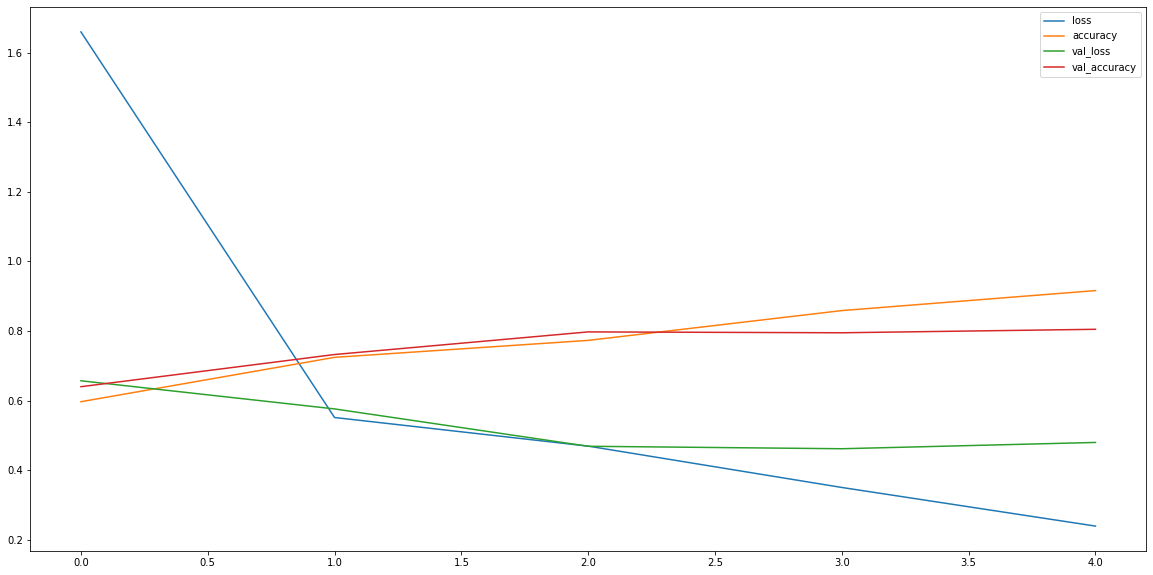

In [20]:
pd.DataFrame(history_4.history).plot(figsize=(20, 10))

## Reducing Overfitting with Pooling

In [21]:
model_5 = tf.keras.models.Sequential()
model_5.add(Conv2D(filters=10,
                   kernel_size=3, 
                   activation='relu',
                   input_shape=(256, 256, 3)))
model_5.add(MaxPool2D(pool_size=2,
                      padding='valid'))
model_5.add(Conv2D(10, 3, activation='relu'))
model_5.add(MaxPool2D())
model_5.add(Conv2D(10, 3, activation='relu'))
model_5.add(MaxPool2D())
model_5.add(Flatten())
model_5.add(Dense(1, activation='sigmoid'))

model_5.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_5 = model_5.fit(training_data_norm,
                        epochs=5,
                        steps_per_epoch=len(training_data_norm),
                        validation_data=validation_data_norm,
                        validation_steps=len(validation_data_norm))

Epoch 1/5
50/50 [==============================] - 6s 88ms/step - loss: 0.6802 - accuracy: 0.5938 - val_loss: 0.6196 - val_accuracy: 0.6925
Epoch 2/5
50/50 [==============================] - 5s 87ms/step - loss: 0.6083 - accuracy: 0.6631 - val_loss: 0.5731 - val_accuracy: 0.7175
Epoch 3/5
50/50 [==============================] - 5s 87ms/step - loss: 0.5496 - accuracy: 0.7225 - val_loss: 0.6163 - val_accuracy: 0.6900
Epoch 4/5
50/50 [==============================] - 5s 88ms/step - loss: 0.5177 - accuracy: 0.7469 - val_loss: 0.5499 - val_accuracy: 0.7325
Epoch 5/5
50/50 [==============================] - 5s 89ms/step - loss: 0.4394 - accuracy: 0.8075 - val_loss: 0.4817 - val_accuracy: 0.7750


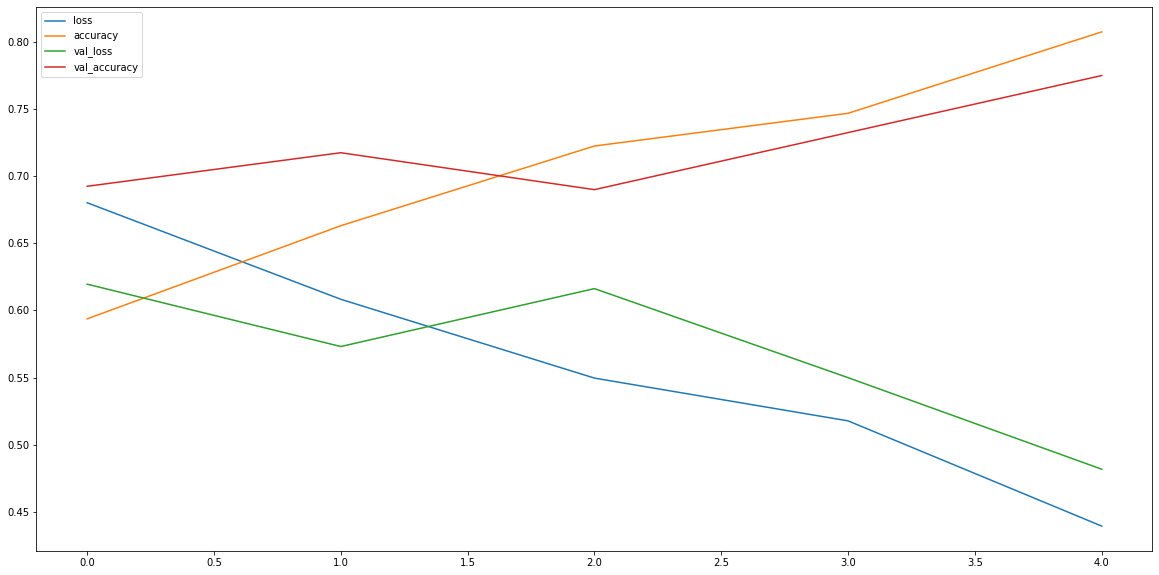

In [22]:
pd.DataFrame(history_5.history).plot(figsize=(20, 10))

## Adding More Data with Augmentation to Avoid Overfitting

In [9]:
data_augmentation = Sequential([
    layers.RandomFlip('horizontal_and_vertical'),
    layers.RandomRotation(0.2)
])

In [10]:
model_6 = tf.keras.models.Sequential()
model_6.add(data_augmentation)
model_6.add(Conv2D(filters=10,
                   kernel_size=3,
                   activation='relu',
                   input_shape=(256,256,3)))
model_6.add(MaxPool2D(pool_size=2,
                      padding='valid'))
model_6.add(Conv2D(filters=10,
                   kernel_size=3,
                   activation='relu'))
model_6.add(MaxPool2D()) # pool_size=(2,2), padding='valid'
model_6.add(Conv2D(10, 3, activation='relu'))
model_6.add(MaxPool2D())
model_6.add(Flatten())
model_6.add(Dense(1, activation='sigmoid'))

model_6.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# history_6 = model_6.fit(training_data_norm,
#                         epochs=20,
#                         steps_per_epoch=len(training_data_norm),
#                         validation_data=validation_data_norm,
#                         validation_steps=len(validation_data_norm))

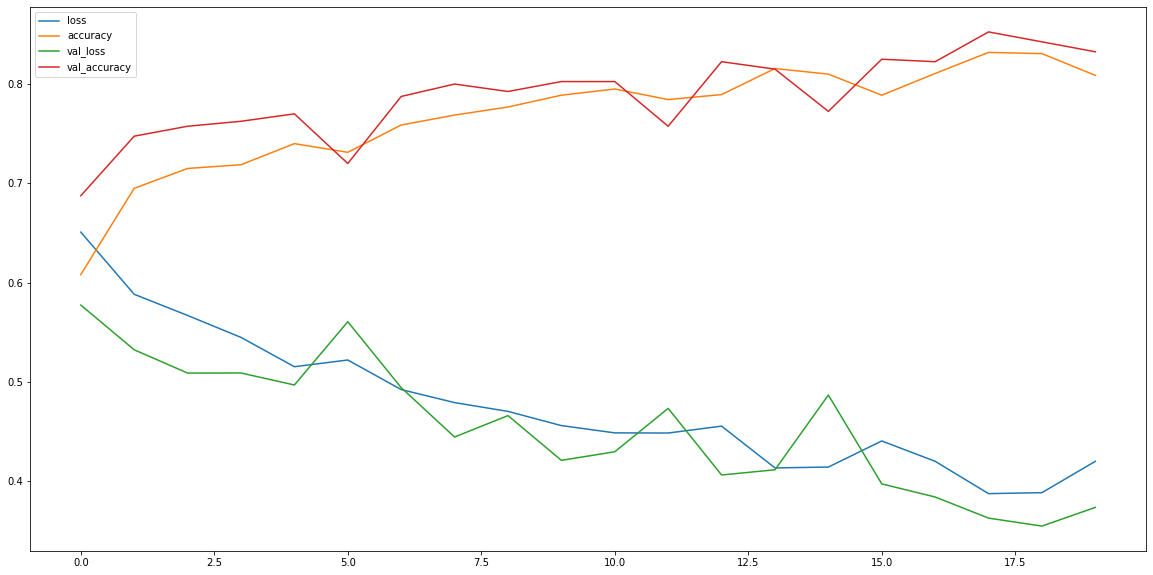

In [43]:
pd.DataFrame(history_6.history).plot(figsize=(20, 10))

## Normalize and Resize

[]

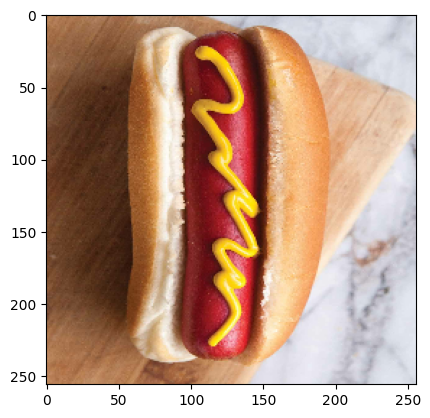

In [16]:
hotdog = tf.io.read_file('hotdog.jpg')
hotdog = tf.image.decode_image(hotdog)
hotdog = tf.image.resize(hotdog, size=[256, 256])
hotdog = hotdog/255

plt.imshow(pizza)
plt.plot()

In [17]:
prediction = model_6.predict(tf.expand_dims(hotdog, axis=0))
prediction

1/1 [==============================] - 0s 152ms/step


array([[0.41801614]], dtype=float32)

In [18]:
pred_class = class_names[int(tf.round(prediction))]
pred_class

'hot_dog'

## Save and Load Model

In [57]:
model_6.save_weights('./checkpoints/my_checkpoint')

In [12]:
model_6.load_weights('./checkpoints/my_checkpoint')